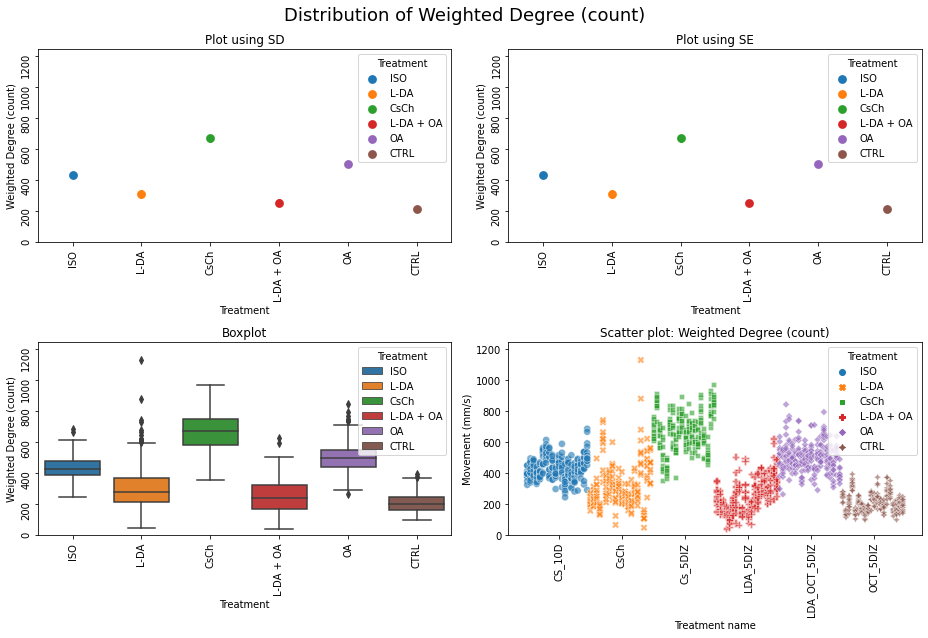

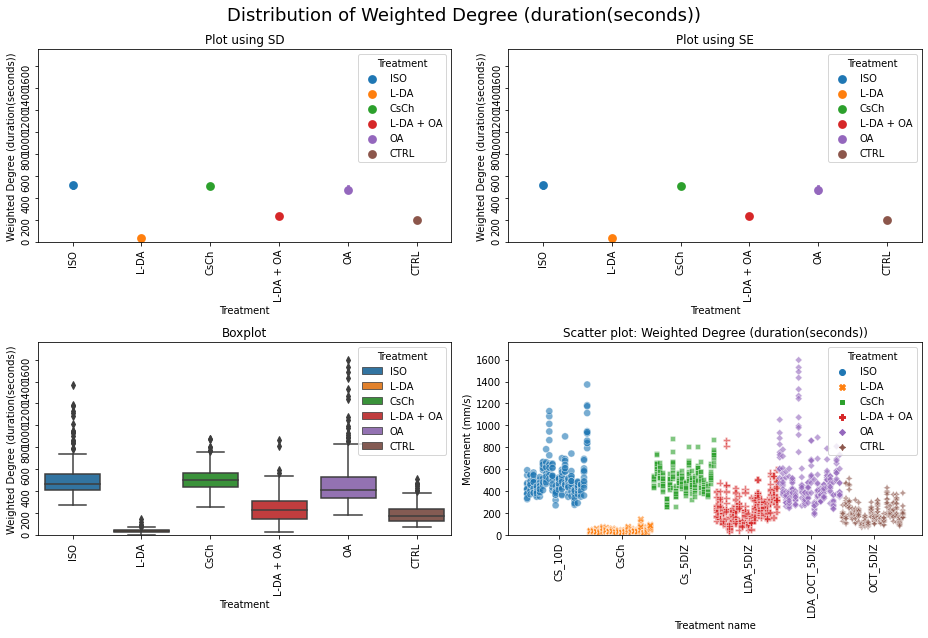

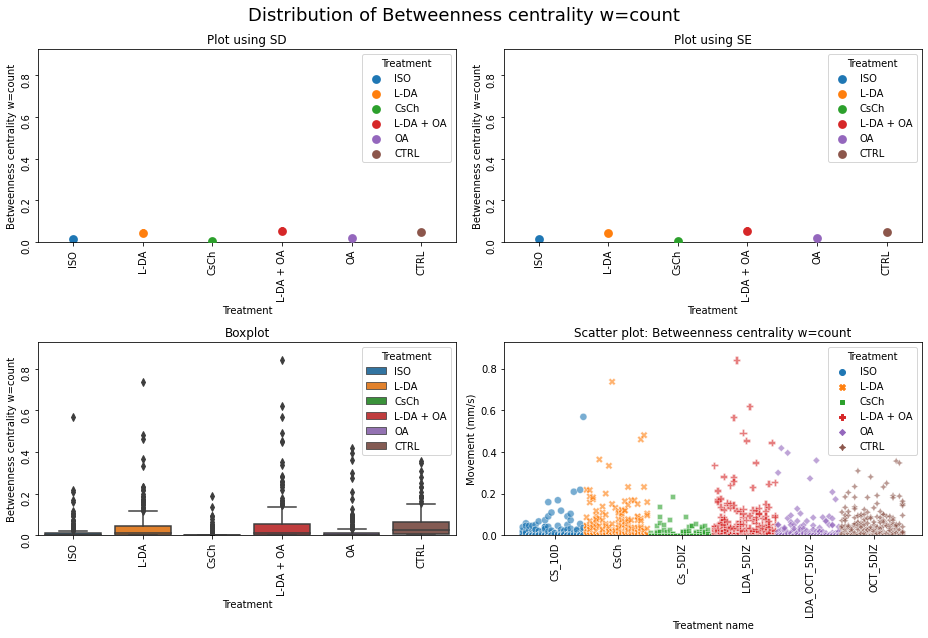

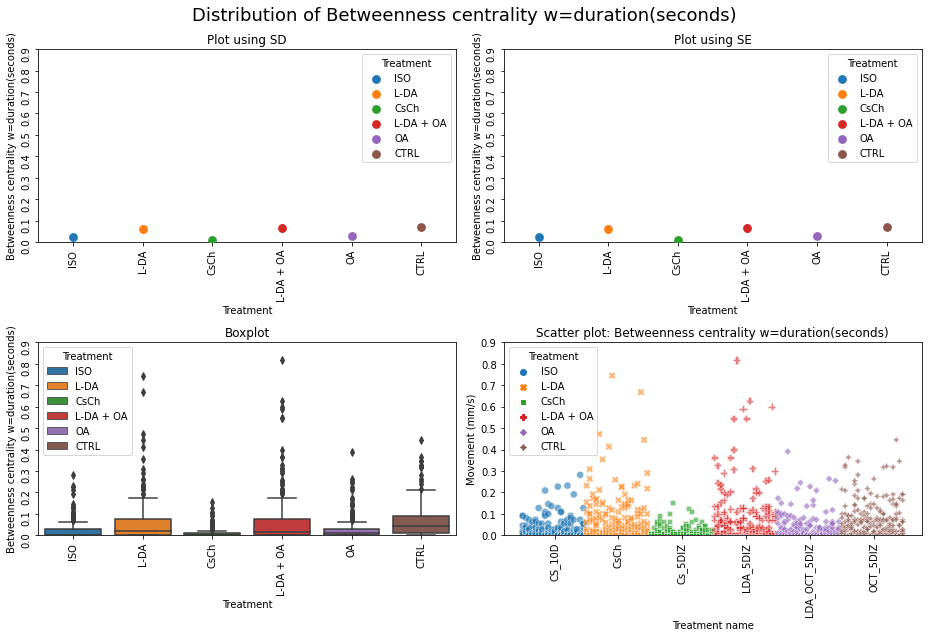

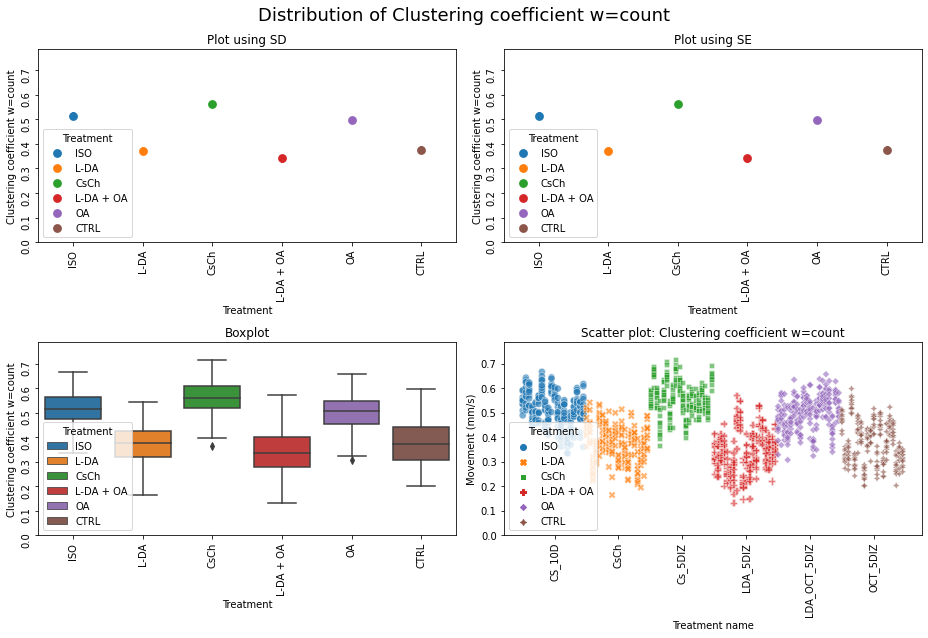

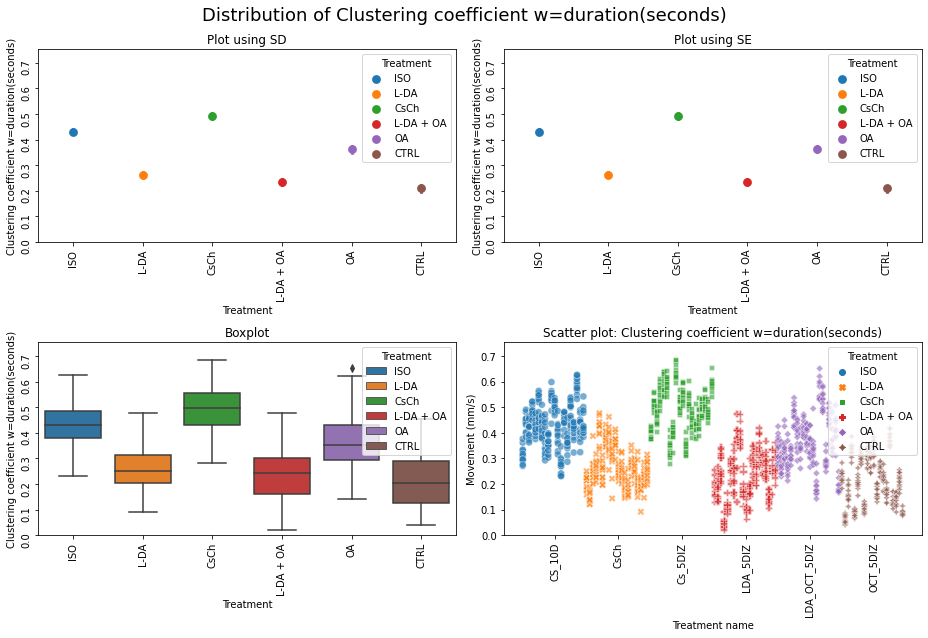

In [11]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats

from src import settings
from src.utils import fileio

config = fileio.get_config(settings.CONFIG_NAME)
TREATMENTS = config["TREATMENTS"]
INPUT_PATH = os.path.join(settings.RESULTS_DIR, "local_measures")
all_treatments = fileio.load_multiple_folders(INPUT_PATH)
all_treatments = {key: value for key, value in all_treatments.items() if key in TREATMENTS}
OUTPUT_DIR = os.path.join(settings.REPORTS_DIR, "figures", "local_measures")
os.makedirs(OUTPUT_DIR, exist_ok=True)

treatment_dataframes = pd.DataFrame()
for treatment_name, treatment_path in all_treatments.items():
    all_groups = fileio.load_files_from_folder(treatment_path)

    for group_name, group_path in all_groups.items():
        df = pd.read_csv(group_path, index_col=0)
        df.rename_axis("Fly")
        df["Treatment"] = treatment_name
        df["Group"] = group_name.replace(".csv", "")
        treatment_dataframes = pd.concat([treatment_dataframes, df])

renamed_treatments = {
        'CsCh': 'CsCh',
        'CS_10D': 'CTRL',
        'Cs_5DIZ': 'ISO',
        'LDA_5DIZ': 'L-DA',
        'OCT_5DIZ': 'OA',
        'LDA_OCT_5DIZ': 'L-DA + OA'
    }

treatment_dataframes = treatment_dataframes.set_index("Treatment", append=True)
treatment_dataframes = treatment_dataframes.set_index("Group", append=True)
treatment_dataframes = treatment_dataframes.dropna(axis=1, how="all")
treatment_dataframes.rename(index=renamed_treatments, level='Treatment', inplace=True)
combined_data_reset = treatment_dataframes.reset_index()

# order = ["Cs_10D", "CsCh", "Cs_5DIZ", "LDA_5DIZ", "OCT_5DIZ", "LDA_OCT_5DIZ"]

measures = [
    'Weighted Degree (count)',
    'Weighted Degree (duration(seconds))',
    'Betweenness centrality w=count',
    'Betweenness centrality w=duration(seconds)',
    'Clustering coefficient w=count',
    'Clustering coefficient w=duration(seconds)',
]

for measure_name in measures:
    if measure_name == "Treatment":
        continue

    if combined_data_reset[measure_name].min() == combined_data_reset[measure_name].max():
        continue

    fig, axes = plt.subplots(2, 2, figsize=(13, 9))
    plt.suptitle(f"Distribution of {measure_name}", fontsize=18)

    sns.pointplot(
        data=combined_data_reset,
        x="Treatment",
        y=measure_name,
        dodge=False,
        hue="Treatment",
        errorbar="sd",
        ax=axes[0, 0],
    )
    axes[0, 0].set_title("Plot using SD")
    axes[0, 0].set_xlabel("Treatment")
    axes[0, 0].set_ylabel(measure_name)
    axes[0, 0].tick_params(rotation=90)
    axes[0, 0].set_ylim(0, combined_data_reset[measure_name].max() * 1.1)

    sns.pointplot(
        data=combined_data_reset,
        x="Treatment",
        y=measure_name,
        dodge=False,
        hue="Treatment",
        errorbar="se",
        ax=axes[0, 1],
    )
    axes[0, 1].set_title("Plot using SE")
    axes[0, 1].set_xlabel("Treatment")
    # axes[0, 1].set_ylabel(measure_name)
    axes[0, 1].tick_params(rotation=90)
    axes[0, 1].set_ylim(0, combined_data_reset[measure_name].max() * 1.1)

    sns.boxplot(
        data=combined_data_reset,
        x="Treatment",
        y=measure_name,
        dodge=False,
        hue="Treatment",
        ax=axes[1, 0],
    )

    axes[1, 0].set_title(f"Boxplot")
    axes[1, 0].set_xlabel("Treatment")
    axes[1, 0].set_ylabel(measure_name)
    axes[1, 0].tick_params(rotation=90)
    axes[1, 0].set_ylim(0, combined_data_reset[measure_name].max() * 1.1)
    # axes[1, 0].legend("")

    sns.scatterplot(
        data=combined_data_reset,
        x="Group",
        y=measure_name,
        hue="Treatment",
        ax=axes[1, 1],
        s=50,
        alpha=0.6,
        markers=True,
        style="Treatment",
    )

    num_of_groups = combined_data_reset.Group.nunique()
    per_group = num_of_groups / len(all_treatments)
    locations_x = [per_group / 2 + (per_group * x) for x in range(0, len(all_treatments))]

    axes[1, 1].set_title(f"Scatter plot: {measure_name}")
    # axes[1, 1].legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Treatment", labels=config["TREATMENTS"])
    axes[1, 1].set_xlabel("Treatment name")
    axes[1, 1].set_ylabel("Movement (mm/s)")
    axes[1, 1].set_xticks(locations_x)
    axes[1, 1].set_xticklabels(config["TREATMENTS"])
    axes[1, 1].tick_params(axis="x", rotation=90)
    axes[1, 1].set_ylim(0, combined_data_reset[measure_name].max() * 1.1)

    plt.tight_layout()

    save_path = os.path.join(OUTPUT_DIR, f"{measure_name}.png")
    plt.savefig(save_path)

    plt.show()

In [10]:
combined_data_reset

,level_0,Treatment,Group,Degree centrality,In-degree centrality,Out-degree centrality,Eigenvector centrality,Closeness centrality,"In-Strength distribution, w=count","Out-Strength distribution, w=count",...,Weighted Degree (duration(seconds)),In-degree,Out-degree,Betweenness centrality w=None,Betweenness centrality w=count,Betweenness centrality w=duration(seconds),Clustering coefficient w=None,Clustering coefficient w=count,Clustering coefficient w=duration(seconds),PageRank centrality
0,fly1,ISO,Cs_5DIZ_01_08_2023_10_10_A1,2.000000,1.000000,1.0,0.288675,1.000000,208,174,...,416.125000,11,11,0.000000,0.004545,0.018182,1.000000,0.535251,0.310704,0.083333
1,fly9,ISO,Cs_5DIZ_01_08_2023_10_10_A1,2.000000,1.000000,1.0,0.288675,1.000000,196,211,...,462.041667,11,11,0.000000,0.000000,0.000000,1.000000,0.558243,0.331143,0.083333
2,fly5,ISO,Cs_5DIZ_01_08_2023_10_10_A1,2.000000,1.000000,1.0,0.288675,1.000000,232,216,...,546.750000,11,11,0.000000,0.000000,0.000000,1.000000,0.589435,0.361671,0.083333
3,fly12,ISO,Cs_5DIZ_01_08_2023_10_10_A1,2.000000,1.000000,1.0,0.288675,1.000000,198,215,...,475.000000,11,11,0.000000,0.009091,0.018182,1.000000,0.562454,0.334442,0.083333
4,fly4,ISO,Cs_5DIZ_01_08_2023_10_10_A1,2.000000,1.000000,1.0,0.288675,1.000000,190,187,...,373.416667,11,11,0.000000,0.009091,0.045455,1.000000,0.534602,0.293275,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,fly10,CTRL,CTRL10_29_01_2024_12_32_A4,2.000000,1.000000,1.0,0.292651,1.000000,90,103,...,159.583333,11,11,0.001818,0.153030,0.027273,0.981818,0.302464,0.077566,0.084537
1436,fly1,CTRL,CTRL10_29_01_2024_12_32_A4,2.000000,1.000000,1.0,0.292651,1.000000,117,104,...,193.583333,11,11,0.001818,0.040909,0.018182,0.981818,0.329408,0.087417,0.084537
1437,fly2,CTRL,CTRL10_29_01_2024_12_32_A4,2.000000,1.000000,1.0,0.292651,1.000000,125,107,...,209.708333,11,11,0.001818,0.013636,0.000000,0.981818,0.341022,0.093718,0.084537
1438,fly7,CTRL,CTRL10_29_01_2024_12_32_A4,1.909091,0.909091,1.0,0.267915,0.916667,79,76,...,164.250000,10,11,0.000909,0.145455,0.190909,0.990000,0.277338,0.077105,0.077915
